In [541]:
import pandas as pd
import numpy as np
from KNN import KNN
from confMatr import ConfusionMatrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [542]:
data = pd.read_csv("task_data.csv")
data.drop(['ID', 'xx', 'yy', 'xy'], axis=1, inplace=True)
data.head()

,Cardiomegaly,Heart width,Lung width,CTR - Cardiothoracic Ratio,normalized_diff,Inscribed circle radius,Polygon Area Ratio,Heart perimeter,Heart area,Lung area
0,0,172,405,"0,424691358",-0.304239,"68,8186",0.213446,"679,4873689",24898,75419
1,1,159,391,"0,4066496164",-0.539387,"73,92564",0.203652,"788,6589419",29851,94494
2,0,208,400,"0,52",-0.371163,"69,33974",0.320787,"862,3229369",33653,66666
3,1,226,435,"0,5195402299",-0.419123,"84,14868",0.317545,"906,724959",42018,82596
4,1,211,420,"0,5023809524",-0.393442,"73,78347",0.263542,"864,2396777",35346,85631


In [543]:
#casting str to float
for col in data.columns:
  if isinstance(data[col][1], str):
    data[col] = data[col].map(lambda x: float(x.replace(',', '.')))

#normalizing inputs
for col in data.columns:
  maksimum = max(data[col])
  minimum = min(data[col])
  data[col] = data[col].map(lambda x: (x-minimum)/(maksimum-minimum))


In [544]:
#confusion matrixes for diffrent methods of calculating distance(for comparision)
cfm_hamming = ConfusionMatrix()
cfm_euclidean = ConfusionMatrix()
cfm_manhattan = ConfusionMatrix()

#evaluating the solution with cross validation
kf = KFold(5, shuffle=True)
for train_id, test_id in kf.split(data):
  #initializing KNN with train dataset and k=6 neighbors
  knn = KNN(np.array(data.loc[train_id]), 6)

  #calculating TP, TN, FP, FN
  for point in np.array(data.loc[test_id]):
    cfm_hamming.evaluate(np.round(knn.predict(np.array(point[1:]), KNN.hamming)), point[0])
    cfm_manhattan.evaluate(np.round(knn.predict(np.array(point[1:]), KNN.manhattan)), point[0])
    cfm_euclidean.evaluate(np.round(knn.predict(np.array(point[1:]))), point[0])

cfm_hamming.print_all("Using Hamming: ")
cfm_euclidean.print_all("Using Euclidean ")
cfm_manhattan.print_all("Using manhattan: ")

Using Hamming:  Accuracy: 0.5135135135135135 Precision: 0.4642857142857143 Recall: 0.8125 F1-score: 0.5909090909090908
Using Euclidean  Accuracy: 0.7027027027027027 Precision: 0.8214285714285714 Recall: 0.7931034482758621 F1-score: 0.8070175438596492
Using manhattan:  Accuracy: 0.7027027027027027 Precision: 0.7857142857142857 Recall: 0.8148148148148148 F1-score: 0.7999999999999999


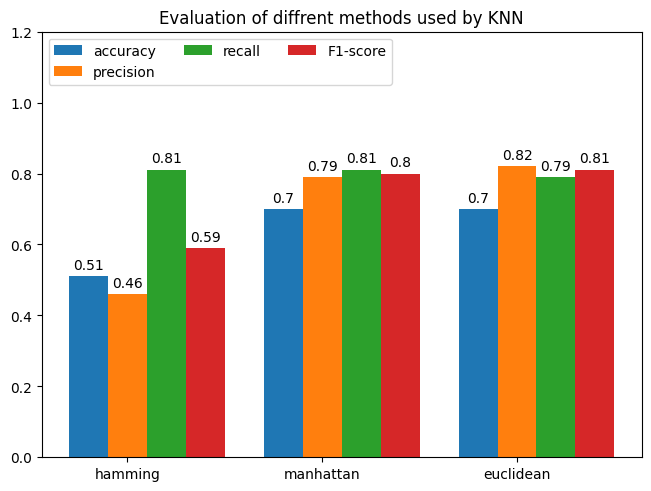

In [545]:
names = ['hamming', 'manhattan', 'euclidean']
values = {
  "accuracy" : (cfm_hamming.accuracy,cfm_manhattan.accuracy,cfm_euclidean.accuracy),
  "precision" : (cfm_hamming.precision,cfm_manhattan.precision,cfm_euclidean.precision),
  "recall" : (cfm_hamming.recall,cfm_manhattan.recall,cfm_euclidean.recall),
  "F1-score" : (cfm_hamming.F1_score,cfm_manhattan.F1_score,cfm_euclidean.F1_score),
}
r = 2

values = {k: (round(v[0],r), round(v[1],r), round(v[2],r)) for k, v in values.items()}

fig, ax = plt.subplots(layout='constrained')
x = np.arange(len(names))
width = 0.2
multiplier = 0

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('Evaluation of diffrent methods used by KNN')
ax.set_xticks(x + width, names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)


plt.show()